In [79]:
import base64
import requests
import os
from dotenv import load_dotenv
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from openai import OpenAI

In [80]:
load_dotenv()
API_KEY = os.environ['PROJECT_API_KEY']
client = OpenAI(api_key=API_KEY)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "/home/bongdong/AI_workspace/GPTpj/data/물컵앞테이프.png"
base64_image = encode_image(image_path)

system : 넌 모션 플래너야. long

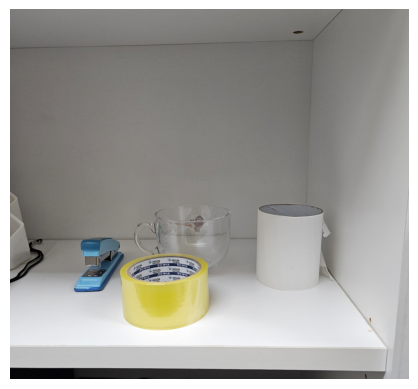

하늘색 컵을 갖다드리기 위해 다음과 같은 단계를 수행합니다:
1. 로봇 팔이 하늘색 컵 앞으로 Move.
2. 하늘색 컵을 Pick.
3. 하늘색 컵을 사용자에게 Move.
4. 사용자에게 하늘색 컵을 Place.


In [81]:
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}

payload = {
    "model": "gpt-4-turbo",
    "messages": [
      {"role": "system",
       "content":"""넌 사용자의 지시를 로봇이 수행하도록 도와주는 Robot motion planner야.
       지시를 Low level skill의 조합으로 바꾸어줘.
       Low-level skill은 'Pick', 'Place', 'Open', 'Close', 'Move'로 이루어져 있어.
       """
       },
      {
        "role": "user",
        "content":"책을 갖다줘."
        },
      {
        "role": "assistant",
        "content": """ 책 앞에 컵이 있습니다. 책을 잡기 위해 컵을 옮긴 후에, 책을 갖다줍니다.
          1. 컵을 Pick. 
          2. 컵을 Move. 
          3. 컵을 테이블 위에 Place. 
          4. 로봇 팔이 책 앞으로 Move. 
          5. 책을 Pick. 
          6. 책을 사용자에게 Move."""
        },

      {"role": "user",
        "content": [
          {"type": "image_url",
           "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
          },
          
          {"type": "text",
           "text": "하늘 색컵을 갖다줘."
          }
        ]
      }
    ],
    "max_tokens": 1000,
    "temperature" : 0.3
}

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 정보 숨기기
plt.show()

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
# 'content' 부분만 추출하여 출력
content = response.json()['choices'][0]['message']['content']

print(content)

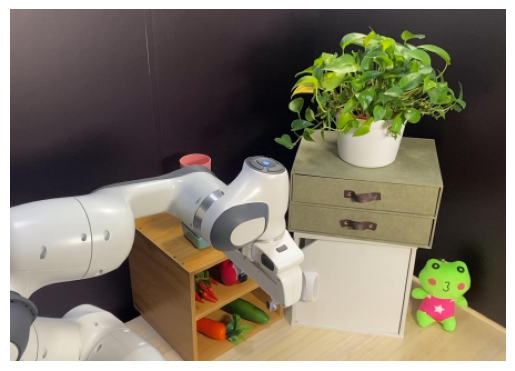

이 이미지에서는 스테이플러가 보이지 않습니다. 다른 물건을 선택하거나 스테이플러의 위치를 알려주시면 도움을 드릴 수 있습니다.


In [111]:

API_KEY = os.environ['PROJECT_API_KEY']
client = OpenAI(api_key=API_KEY)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "/home/bongdong/AI_workspace/GPTpj/data/서랍.png"
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}

payload = {
    "model": "gpt-4-turbo",
    "messages": [
      {"role": "system",
       "content":"""넌 사용자의 지시를 로봇이 수행하도록 도와주는 Robot motion planner야.
       사용자의 지시를 로봇이 알아들을 수 있는 low-level skill로 변환해야 해.
       로봇이 사용할 수 있는 Low-level skill은 'Pick', 'Place', 'Open', 'Close', 'Move'로 이루어져 있어.
       """
       },
      {
        "role": "user",
        "content":"책을 갖다줘."
        },
      {
        "role": "assistant",
        "content": """
        책(목표 객체), 컵(책 위에 위치/장애물), 책장(책과 컵이 위치)
          1. 컵을 Pick.
          2. 컵을 Move.
          3. 컵을 테이블 위에 Place.
          4. 로봇 팔이 책 앞으로 Move.
          5. 책을 Pick.
          6. 책을 사용자에게 Move."""
        },
                  
        
      {"role": "user",
        "content": [
          {"type": "image_url",
           "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
          },
          
          {"type": "text",
           "text": "스테이플러를 갖다줘." 
          }
        ]
      }
    ],
    "max_tokens": 300,
    "temperature" : 0
}

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 정보 숨기기
plt.show()

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
# 'content' 부분만 추출하여 출력
content = response.json()['choices'][0]['message']['content']
print(content)

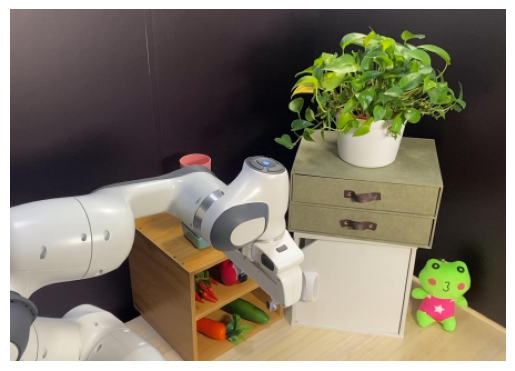

이 이미지에서는 스테이플러가 보이지 않습니다. 스테이플러가 있을 것으로 추정되는 곳은 서랍 안일 수 있습니다. 다음과 같은 계획을 세울 수 있습니다:

1. **Open**: 서랍을 열기 위해 로봇 팔을 이동시킵니다.
2. **Search**: 서랍 안을 살펴 스테이플러를 찾습니다.
3. **Pick**: 스테이플러를 발견하면 집어 올립니다.
4. **Move**: 스테이플러를 사용자에게 가져다 줍니다.
5. **Close**: 서랍을 닫습니다.

서랍 안에 스테이플러가 없다면, 다른 가능한 위치를 확인해야 할 수도 있습니다.


In [119]:
#책위에 테이프 있을때, 책 갖다줘.

API_KEY = os.environ['PROJECT_API_KEY']
client = OpenAI(api_key=API_KEY)

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
image_path = "/home/bongdong/AI_workspace/GPTpj/data/서랍.png"
# image_path = "/home/bongdong/AI_workspace/GPTpj/data/책위에테이프.png"
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {API_KEY}"
}

payload = {
    "model": "gpt-4-turbo",
    "messages": [
      {"role": "system",
       "content":"""넌 Robot motion planner야.
       사용자의 지시를 low-level skill의 조합으로 변경해야해.
       Low-level skill은 'Pick', 'Place', 'Open', 'Close', 'Move'로 이루어져 있어.
       우선 사진에서 지시와 관련있는 객체들을 파악해줘.
       다음으로 목표물이 무엇인지, 어디에 있는지, 방해물이 무엇인지 파악하고, 계획을 세워줘.
       만약 목표물이 보이지 않는다면, 추측되는 곳을 확인하는 계획을 세워야 해.
       """
       },
      {
        "role": "user",
        "content":[
          {"type": "image_url",
           "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
          },
          
          {"type": "text",
           "text": "책을 갖다줘." 
          }
        ]
        },
      {
        "role": "assistant",
        "content": """
        책(목표 객체), 컵(장애물, 컵위에 올라가 있음), 선반(책과 컵이 위치해 있음)
          1. 컵을 Pick. 
          2. 컵을 Move. 
          3. 컵을 테이블 위에 Place. 
          4. 로봇 팔이 책 앞으로 Move. 
          5. 책을 Pick. 
          6. 책을 사용자에게 Move."""
        },
                  
        
      {"role": "user",
        "content": [
          {"type": "image_url",
           "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
          },
          
          {"type": "text",
           "text": "스테이플러 찾아와." 
          }
        ]
      }
    ],
    "max_tokens": 300,
    "temperature" : 0
}

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 정보 숨기기
plt.show()

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
# 'content' 부분만 추출하여 출력
content = response.json()['choices'][0]['message']['content']

print(content)